두 개의 선택지 중 정답을 고르는 문제 : 이진분류(Binary Classification)

로지스틱 회귀는 분류(Classification)에 사용

#1. 이진분류(Binary Classification)

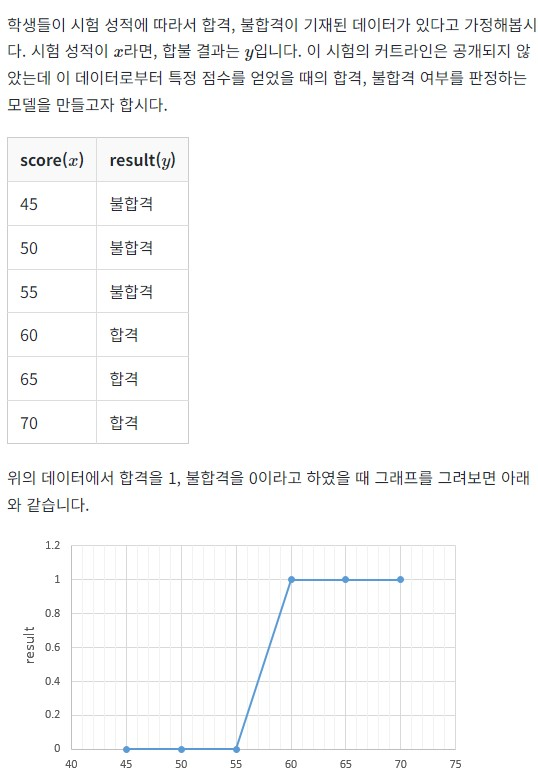

로지스틱 회귀의 가설은 선형 회귀 때의 H(x) = Wx+b가 아니라 S자 모양의 그래프를 만들 수 있는 특정함수 f를 사용하여 H(x) = f(Wx+b)의 가설 사용

대표적인 S자 그래프 = sigmoid funtion

#2. Sigmoid function

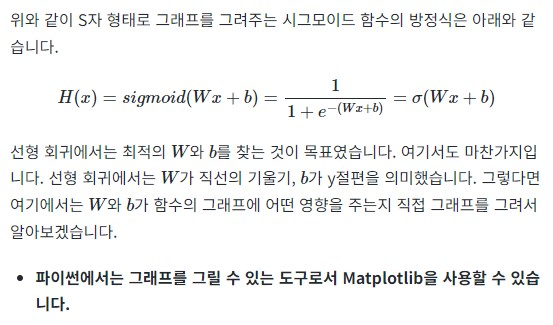

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

##1) W가 1이고 b가 0인 그래프

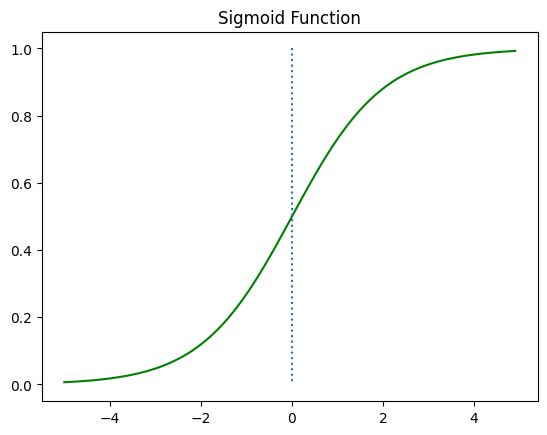

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

##2) W값의 변화에 따른 경사도 변화

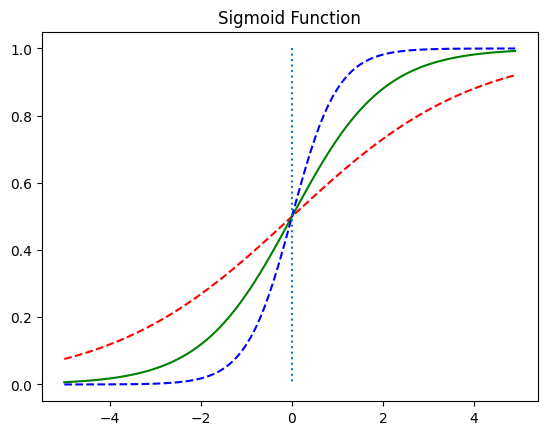

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

##3) b값의 변화에 따른 좌, 우 이동

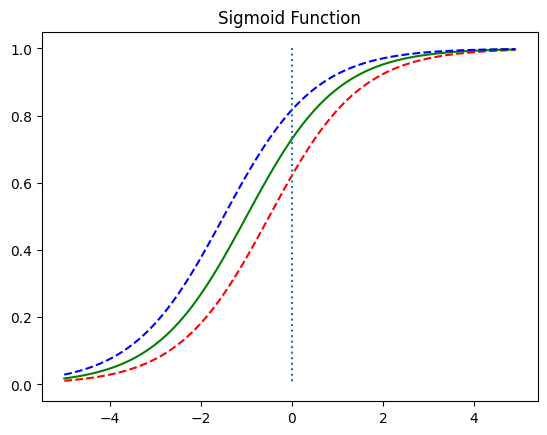

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

#3. Cost function

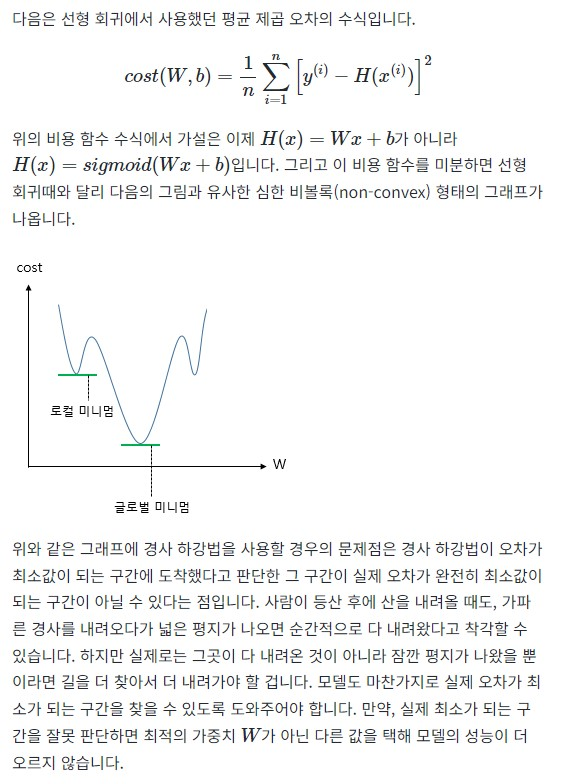

전체 함수에 걸쳐 최소값인 Global Minimum이 아닌 특정 구역에서의 최소값인 Local Minimum에 도달했다고 함.

이는 cost가 최소가 되는 가중치W를 찾는다는 비용함수 목적에 맞지 않음

시그모이드 함수의 출력값은 0과 1사이의 값.

실제값이 1일 때 예측값이 0이면 오차가 커지고, 실제값이 0일 때 예측값이 1에 가까워지면 오차가 커짐.

이를 충족하는 함수가 로그함수

아래는 y = 0.5에 대칭하는 두 개의 로그함수 그래프임.

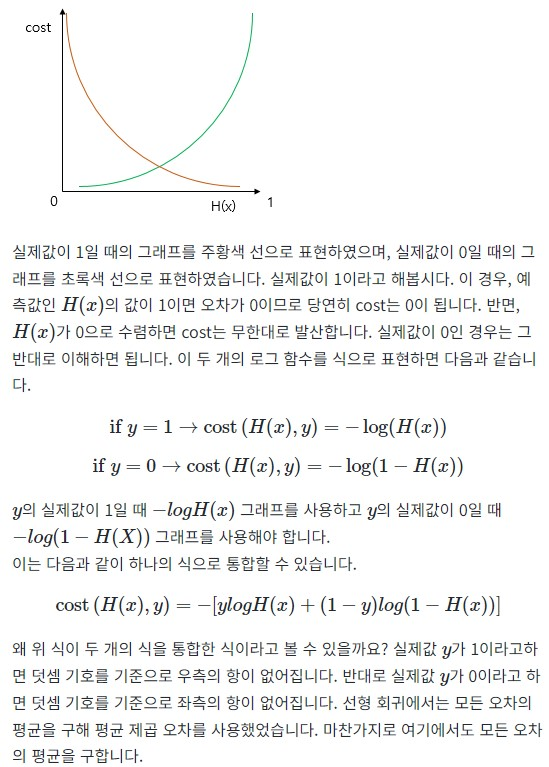

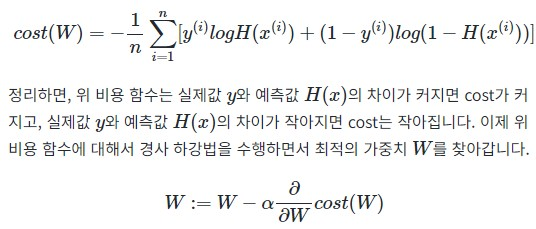

#4. 파이토치로 로지스틱 회귀 구현

In [ ]:
 import torch
 import torch.nn as nn
 import torch.nn.functional as F
 import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [ ]:
hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [ ]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [ ]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [ ]:
-(y_train[0] * torch.log(hypothesis[0])+(1-y_train[0])*torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [ ]:
losses = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [ ]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)
#optimizer 설정
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = -(y_train * torch.log(hypothesis)+(1-y_train)*torch.log(1-hypothesis)).mean()

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 ==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
